# 5. Exercise - Using BeautifulSoup and Selenium on News Web Portal

Extract daily COVID-19 statistics from theStar

Location: https://www.thestar.com.my/news/nation/2020/03/23/covid-19-current-situation-in-malaysia-updated-daily

In [14]:
import requests
from bs4 import BeautifulSoup

url='https://www.thestar.com.my/news/nation/2020/03/23/covid-19-current-situation-in-malaysia-updated-daily'

# get the webpage
webpage = requests.get(url)

# load webpage into bs4
soup = BeautifulSoup(webpage.content, 'html.parser')

links=[]

# get data simply by looking for all <a> links
for link in soup.find_all('a'):
    links.append(link)

links

In [15]:
import requests
from bs4 import BeautifulSoup

url='https://www.thestar.com.my/news/nation/2020/03/23/covid-19-current-situation-in-malaysia-updated-daily'

# get the webpage
webpage = requests.get(url)

# load webpage into bs4
soup = BeautifulSoup(webpage.content, 'html.parser')

link_texts=[]

# get data simply by looking for all <a> links
for links in soup.find_all('a'):
    link_texts.append(links.text)

link_texts

## Scraping for the information needed from the web page

In Web scraping you will need to access the information to be scraped and **hunt** for the corresponding **HTML tags**

For example the table shown on the left is the daily accumulated total cases, new cases, total death and total recovered. On the highlighted right side is the HTML.

*(do this after intro to HTML class and id)*


<img src="./Images/Intro3.png">

In [3]:
# Scrape the table
import requests
from bs4 import BeautifulSoup

url='https://www.thestar.com.my/news/nation/2020/03/23/covid-19-current-situation-in-malaysia-updated-daily'

# get the webpage
webpage = requests.get(url)

# load webpage into bs4
soup = BeautifulSoup(webpage.text, 'html.parser')

data = []

# Find all div
soup_div = soup.find_all('div')


In [4]:
print(len(soup_div)) # total items in the list

323


In [16]:
# print(soup_div[:10]) # print just only the first 10 items in the list

In [17]:
# print(soup_div[-10:]) # print just only the last 10 items in the list

In [18]:
# Find ALl Containers

soup_div = soup.find_all('div',attrs={'class':'container'})

soup_div

In [8]:
# Get the table for COVID19 identified by the div tag and id=table-container 
soup_div = soup.find_all('div',attrs={'id':'table-container'})
soup_div

[]

[ ]

**EMPTY?**

Why?

Something went wrong? Returned webpage assigned to soup is empty? Let's check


In [19]:
# show soup
soup

**No**

Content of the webpage is loaded into soup

**Try Selenium**

Let's try using Selenium instead of Requests

In [ ]:
# import requests
import time
from selenium import webdriver
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

url='https://www.thestar.com.my/news/nation/2020/03/23/covid-19-current-situation-in-malaysia-updated-daily'

webpage = driver.get(url)

time.sleep(1)

# load webpage into webdriver
soup = BeautifulSoup(webpage.page_source, 'html.parser')

soup_div = soup.find_all('div',attrs={'id':'table-container'})

soup_div

# will not work, cause data not on this server anyway

driver.close()


## Check HTML code of the Web page again

<img src='./Images/flourish3.png'>

Notice that there is an iFrame Tag highlighted above?

The actual location of the source web page is embeded within the iframe of theStar

<img src='./Images/flourish4.png'>

Change the URL to the actual source.


In [1]:
import requests
from bs4 import BeautifulSoup

url='https://public.flourish.studio/visualisation/1641110/?utm_source=showcase&utm_campaign=visualisation/1641110'

# get the data
data = requests.get(url)

# load data into bs4
soup = BeautifulSoup(data.text, 'html.parser')

data=[]
# get data simply by looking for each a links
for tr in soup.find_all('div',attrs={'class':'tr body-row'}):
    print(tr)
    data.append(tr.text)

data


KeyboardInterrupt



In [ ]:
# soup.find_all('div')
soup.prettify

### Cannot Use BeautifulSoup

<img src='./Images/flourish.png'>

Check the Javascript found above. 

The data for the table is within the Javascript coding.

**2 options.**

**Option 1.** Try to Scrape the Javascript. Not that possible, unless fully understand how the Javascript program going to output the HTML to the Web Page.

**Option 2.** Use Selenium Webdriver to run the Javascript within the webdriver and then scrape the HTML output.




In [4]:
requests.get('https://public.flourish.studio/visualisation/1641110/embed?auto=1', verify=False)

c:\Users\Kahhou_Lau\AppData\Local\anaconda3\envs\ads\lib\site-packages\urllib3\connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'public.flourish.studio'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\Kahhou_Lau\AppData\Local\anaconda3\envs\ads\lib\site-packages\urllib3\connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'flo.uri.sh'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>

In [1]:
# Use Selenium 
# from selenium import webdriver
# import chromedriver_binary  # Adds chromedriver binary to path
# from webdriver_manager.chrome import ChromeDriverManager


from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By


service = Service(executable_path='/usr/local/bin/chromedriver')
driver = webdriver.Chrome(service=service)

url='https://public.flourish.studio/visualisation/1641110/embed?auto=1'
driver.get(url)

# load data into bs4
soup = BeautifulSoup(driver.page_source,'html.parser')

data=[]
# get data simply by looking for each a links
for tr in soup.find_all('div',attrs={'class':'tr body-row'}):
    tokens = tr.text.split('\n')
    print(tokens)

data

NoSuchDriverException: Message: Unable to locate or obtain driver for chrome; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors/driver_location


In [13]:
soup = BeautifulSoup(driver.page_source,'html.parser')
soup

<html><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<base target="_blank"/>
<link href="https://flo.uri.sh/template/1065/v24/static/style.css" rel="stylesheet" type="text/css"/>
<link href="https://fonts.googleapis.com/css?family=Source+Sans+Pro:400,700" rel="stylesheet" type="text/css"/>
<title>COVID-19 MALAYSIA TABLE</title><style id="flourish-page-styles" type="text/css">html { font-size:62.5%; }

@media(min-width: 380px) {
html { font-size:75%; }
}

@media(min-width: 580px) {
html { font-size:87.5%; }
}

@media(min-width: 1080px) {
html { font-size:100%; }
}

@media(min-width: 1280px) {
html { font-size:120%; }
}

</style><style type="text/css">.flourish-footer { margin: 0; } .flourish-footer p { margin: 0; display: inline; } .flourish-footer p:empty { height: 0; } .flourish-footer a { color: inherit; } .flourish-footer-note { padding-left: 3px; } .flourish-footer-source:empty + .flourish-footer-note { padding-left: 0; }</style

In [ ]:
# from selenium import webdriver
# from bs4 import BeautifulSoup

# driver = webdriver.Chrome('./bin/chromedriver')

# url='https://public.flourish.studio/visualisation/1641110/embed?auto=1'

# get the data
# driver.get(url)

# load data into bs4
soup = BeautifulSoup(driver.page_source,'html.parser')

data=[]
# get data simply by looking for each a links
for tr in soup.find_all('div',attrs={'class':'tr body-row'}):
    for td in soup.find_all('div',attrs={'class':'td'}):
        data.append(td.text)

# driver.close()

data

In [45]:
from selenium import webdriver
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

url='https://public.flourish.studio/visualisation/1641110/embed?auto=1'

# get the data
driver.get(url)

# load data into bs4
soup = BeautifulSoup(driver.page_source,'html.parser')

data=[]
# get data simply by looking for each a links
for tr in soup.find_all('div',attrs={'class':'tr body-row'}):
    for td in soup.find_all('div',attrs={'class':'td'}):
        data.append(td.text.rstrip())

data

ConnectionError: Could not reach host. Are you offline?

In [ ]:
# Next Page

driver.find_element_by_xpath('/html/body/main/section[4]/div[1]/div/div[4]/button[2]').click()

soup = BeautifulSoup(driver.page_source,'html.parser')

data=[]
# get data simply by looking for each a links
for tr in soup.find_all('div',attrs={'class':'tr body-row'}):
    for td in soup.find_all('div',attrs={'class':'td'}):
        data.append(td.text)

data

# depends
# if first time scrape, must scrape all previous pages. then paginate and get those data
# if only need to get the latest everyday, then no need to grab the same data all over again

# look at this class="pagination-total"


EXERCISE:
- Scrape table on this URL: "https://public.flourish.studio/visualisation/1641110/?utm_source=showcase&utm_campaign=visualisation/1641110"
- Use Selenium to scrape data
- Scrape data from 1st Jan 2021 until 20th Mar 2021 
- Use drive.click() to navigate pagination
- Feel free to drop me questions/Google/refer notes during this exercise.

### HOMEWORK:
- Scrape data on this URL: "https://www.mydin.my"
- Use Selenium to scrape data
- Use drive.click() to navigate pagination
- Access at least two categories and extract the product data: title, price, category, pic url

In [2]:
# Initiate and import libraries
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd

In [3]:
service = Service(executable_path='chromedriver.exe')
driver = webdriver.Chrome(service=service)
url='https://www.mydin.my/'
driver.get(url)
time.sleep(5)

In [4]:
#Provide inputs to  clear the pop up
poskod_element = driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div[1]/div[2]/div/div[2]/div/div[1]/div[1]/div[1]/div/div/input")
poskod_element.send_keys("63000")
time.sleep(1)

gunakan_element = driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div[1]/div[2]/div/div[2]/div/div[1]/div[1]/div[1]/div/div/button")
gunakan_element.click()
time.sleep(1)

kedai_berdekatan_saya_element = driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div[1]/div[2]/div/div[2]/div/div[1]/div[1]/div[2]/div[1]/label[1]")
kedai_berdekatan_saya_element.click()
time.sleep(1)

sahkan_element = driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div[1]/div[2]/div/div[2]/div/div[1]/div[1]/div[2]/div[2]/button")
sahkan_element.click()
time.sleep(1)

In [5]:
#Click on category
kategori_element = driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div[1]/div[2]/div/div[1]/form/div[1]/div/div[1]/span")
kategori_element.click()
time.sleep(2)

In [6]:
#Click on first category: Makanan
makanan_element = driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div[1]/div[2]/div/div[1]/form/div[1]/div/div[3]/div/div[1]/div[2]/div[1]")
makanan_element.click()
time.sleep(1)

In [7]:
#Wait for the products to load with default timeout of 30 seconds
try:
    #start_time = time.time()
    product_list = []
    next_btn_exist = True
    kategori = ""
    while len(product_list) < 100 and next_btn_exist == True:
        # Wait for the refresh button to goes off
        WebDriverWait(driver, 30).until(
            EC.invisibility_of_element_located((By.CLASS_NAME, "loader__ring"))
        )
        # list_produk_element = WebDriverWait(driver, 30).until(
        #     EC.presence_of_element_located((By.CLASS_NAME, "product-listing"))
        # )
        bil_produk_element = driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div[2]/div[2]/div[1]/div/div/span")
        if (kategori == ""):
            breadcrumb_element = driver.find_element(By.CLASS_NAME, "breadcrumb")
            breadcrumb = breadcrumb_element.text.split("\n")
            kategori = breadcrumb[-1]
        #print(kategori)
        #print(bil_produk_element.text)
        #end_time = time.time()
        #duration = end_time - start_time
        #print(f"Products for {kategori} loaded at {duration:.2f} seconds.")
        produk_element = driver.find_elements(By.CLASS_NAME, "product-card")

        for product in produk_element:
            product_title = product.find_element(By.CLASS_NAME, "product-card__content__name").text
            product_price = product.find_element(By.TAG_NAME, "h3").text
            product_image_url = product.find_element(By.TAG_NAME, "img").get_attribute("src")
            product_details = {
                "Product Title": product_title,
                "Category": kategori,
                "Price": product_price,
                "Image": product_image_url,
            }
            product_list.append(product_details)

        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)

        try:
            next_btn_element = driver.find_element(By.CLASS_NAME, "feather-arrow-right")
            next_btn_exist = True
            if(len(product_list) == 100):
                break
            else:
                next_btn_element.click()
        except:
            next_btn_exist = False
            break
    
    # Convert to Data Frame
    # df = pd.DataFrame(product_list)
    # print(f"There are {df.shape[0]} products in the list.")
    # print(df.T.head(5))
except:
    try:
        bil_produk_element = driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div[2]/div[2]/div[1]/div/div/span")
        if(bil_produk_element.text == "(0 Produk)"):
           print("No products found for this category.")
    except:
        print("Page is not loaded or something went wrong.")

In [8]:
#Click on category
kategori_element = driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div[1]/div[2]/div/div[1]/form/div[1]/div/div[1]/span")
kategori_element.click()
time.sleep(2)

In [9]:
#Click on second category: Peralatan rumah > Peralatan Dapur
peralatan_rumah_element = driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div[1]/div[2]/div/div[1]/form/div[1]/div/div[3]/div/div[1]/div[10]/div[2]")
peralatan_rumah_element.click()
time.sleep(1)
peralatan_dapur_element = driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div[1]/div[2]/div/div[1]/form/div[1]/div/div[3]/div/div[2]/div[4]/div[1]")
peralatan_dapur_element.click()

In [10]:
#Wait for the products to load with default timeout of 30 seconds
try:
    #start_time = time.time()
    #product_list = []
    next_btn_exist = True
    kategori = ""
    while len(product_list) < 200 and next_btn_exist == True:
        # Wait for the refresh button to goes off
        WebDriverWait(driver, 30).until(
            EC.invisibility_of_element_located((By.CLASS_NAME, "loader__ring"))
        )
        # list_produk_element = WebDriverWait(driver, 30).until(
        #     EC.presence_of_element_located((By.CLASS_NAME, "product-listing"))
        # )
        bil_produk_element = driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div[2]/div[2]/div[1]/div/div/span")
        if (kategori == ""):
            breadcrumb_element = driver.find_element(By.CLASS_NAME, "breadcrumb")
            breadcrumb = breadcrumb_element.text.split("\n")
            kategori = breadcrumb[-2] + "/" + breadcrumb[-1]
        #print(kategori)
        #print(bil_produk_element.text)
        #end_time = time.time()
        #duration = end_time - start_time
        #print(f"Products for {kategori} loaded at {duration:.2f} seconds.")
        produk_element = driver.find_elements(By.CLASS_NAME, "product-card")

        for product in produk_element:
            product_title = product.find_element(By.CLASS_NAME, "product-card__content__name").text
            product_price = product.find_element(By.TAG_NAME, "h3").text
            product_image_url = product.find_element(By.TAG_NAME, "img").get_attribute("src")
            product_details = {
                "Product Title": product_title,
                "Category": kategori,
                "Price": product_price,
                "Image": product_image_url,
            }
            product_list.append(product_details)

        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)

        try:
            next_btn_element = driver.find_element(By.CLASS_NAME, "feather-arrow-right")
            next_btn_exist = True
            if(len(product_list) == 200):
                break
            else:
                next_btn_element.click()
        except:
            next_btn_exist = False
            break

except:
    try:
        bil_produk_element = driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div[2]/div[2]/div[1]/div/div/span")
        if(bil_produk_element.text == "(0 Produk)"):
           print("No products found for this category.")
    except:
        print("Page is not loaded or something went wrong.")

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.DataFrame(product_list)

In [24]:
df.head().T

,0,1,2,3,4
Product Title,Double Decker Green Pea Cracker (80g),Prego Spicy Seafood Arrabbiata Pasta Sauce (295g),Maggi Curry Cube (60g),Lady Choice Peanut Butter (530g) - Chocolate,Lady Choice Peanut Butter (530g) - Grape
Category,Makanan,Makanan,Makanan,Makanan,Makanan
Price,RM 2.20,RM 7.20,RM 3.30,RM 16.88,RM 16.88
Image,https://backoffice.mydin.com.my/product_upload...,https://backoffice.mydin.com.my/product_upload...,https://backoffice.mydin.com.my/product_upload...,https://backoffice.mydin.com.my/product_upload...,https://backoffice.mydin.com.my/product_upload...


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product Title  200 non-null    object
 1   Category       200 non-null    object
 2   Price          200 non-null    object
 3   Image          200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [26]:
df.shape

(200, 4)

In [27]:
df.nunique()

Product Title    200
Category           2
Price            107
Image            200
dtype: int64

In [28]:
# Convert Price from String to Float
df['Price'] = df['Price'].str.replace('RM ', '').astype(float)

In [29]:
df['Price'].describe()

count    200.00000
mean      33.89115
std       43.15167
min        0.60000
25%        5.74750
50%       13.20000
75%       59.13500
max      289.90000
Name: Price, dtype: float64

In [34]:
mean_price = df['Price'].mean()
mode_price = df['Price'].mode()[0]
median_price = df['Price'].median()

print(f"Mean: {mean_price}")
print(f"Mode: {mode_price}")
print(f"Median: {median_price}")

Mean: 33.891149999999996
Mode: 9.9
Median: 13.2


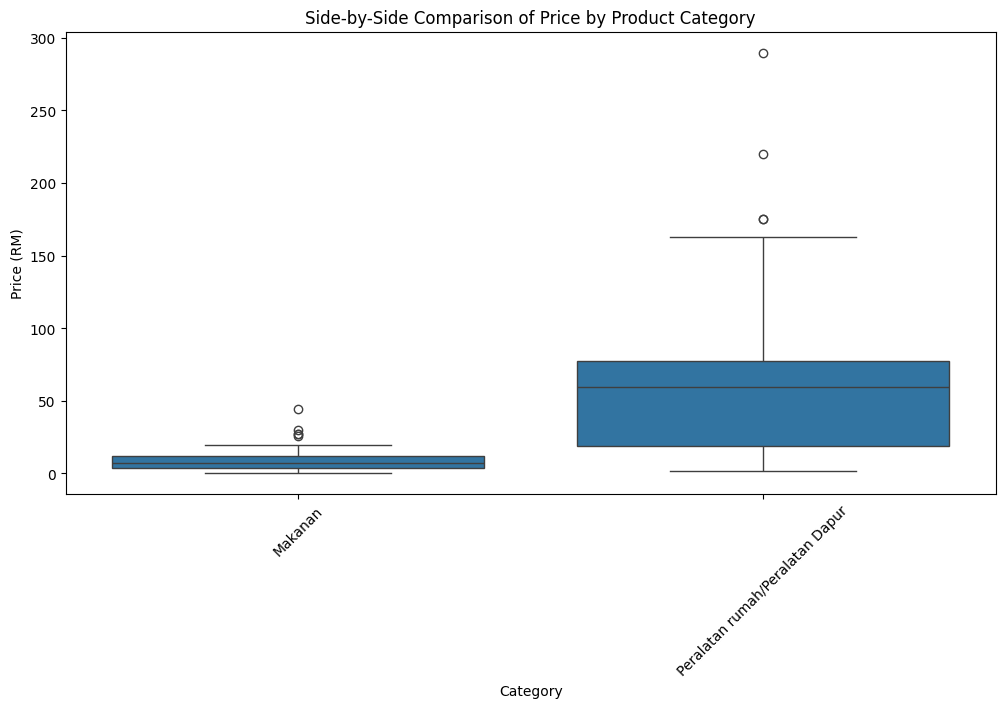

In [30]:
# Side-by-Side Comparison of Price by Product Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=df)
plt.xlabel('Category')
plt.ylabel('Price (RM)')
plt.title('Side-by-Side Comparison of Price by Product Category')
plt.xticks(rotation=45)
plt.show()

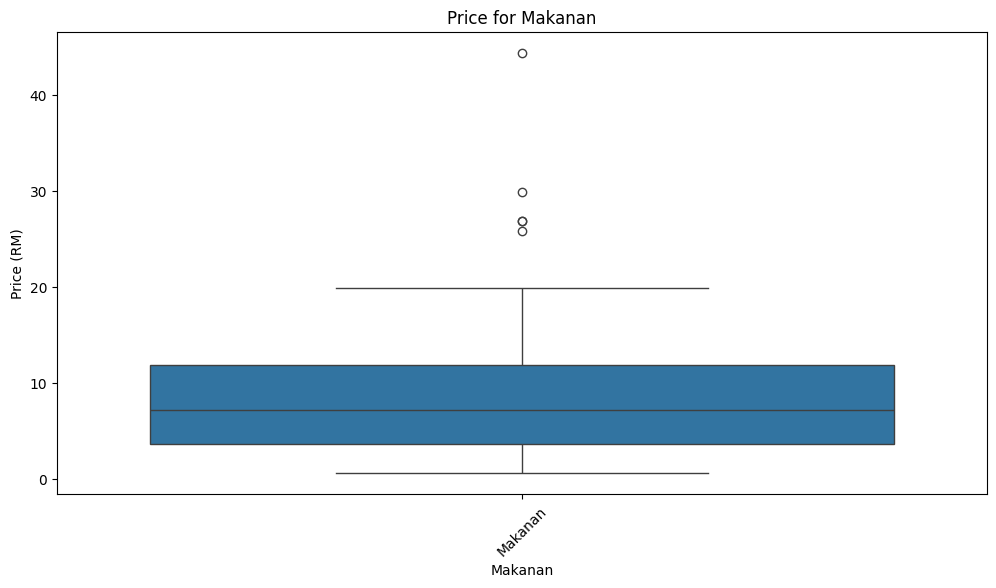

In [36]:
df_makanan = df[df['Category'] == 'Makanan']

# Create boxplot for Makanan
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=df_makanan)
plt.xlabel('Makanan')
plt.ylabel('Price (RM)')
plt.title('Price for Makanan')
plt.xticks(rotation=45)
plt.show()


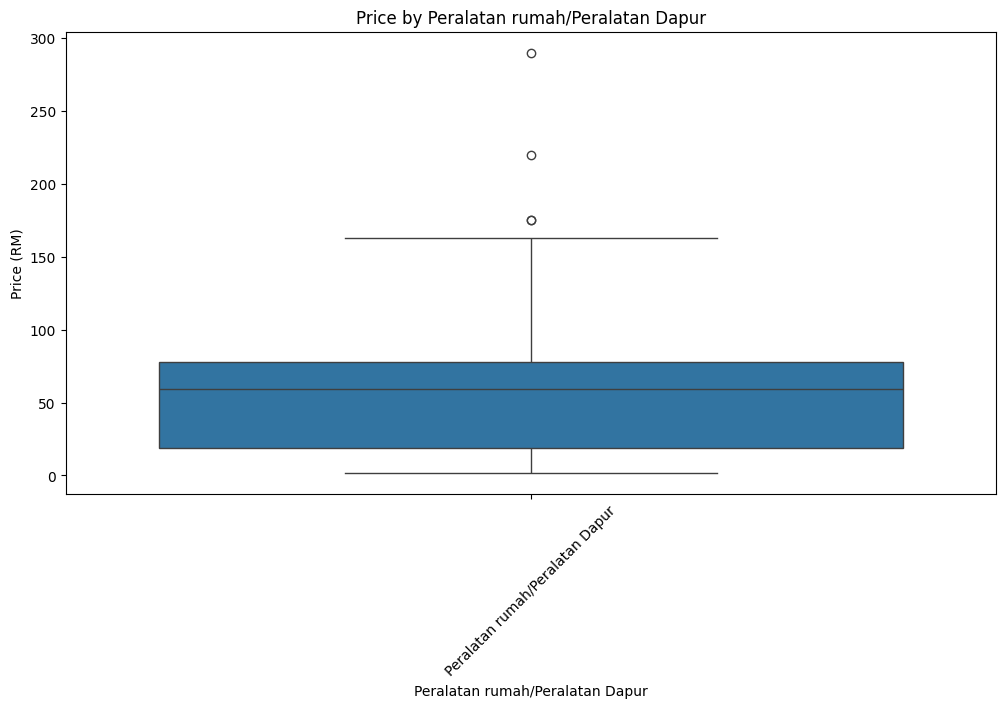

In [37]:
df_peralatan_rumah = df[df['Category'] == 'Peralatan rumah/Peralatan Dapur']

# Create boxplot for Peralatan rumah/Peralatan Dapur
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=df_peralatan_rumah)
plt.xlabel('Peralatan rumah/Peralatan Dapur')
plt.ylabel('Price (RM)')
plt.title('Price by Peralatan rumah/Peralatan Dapur')
plt.xticks(rotation=45)
plt.show()